In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
houseprice = pd.read_csv('house price prediction.csv')
houseprice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
houseprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
houseprice.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
null_values = houseprice.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
houseprice.drop('Id', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
houseprice['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [9]:
houseprice.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\4267102320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace = True)


In [10]:
houseprice = houseprice.drop('Alley', axis=1)

In [11]:
houseprice = houseprice.drop('PoolQC', axis=1)

In [12]:
houseprice = houseprice.drop('FireplaceQu', axis=1)

In [13]:
houseprice = houseprice.drop('MasVnrType', axis=1)

In [14]:
houseprice = houseprice.drop('MiscFeature', axis=1)

In [15]:
houseprice = houseprice.drop('Fence', axis=1)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2881373968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['LotFrontage'])


<Axes: xlabel='LotFrontage', ylabel='Density'>

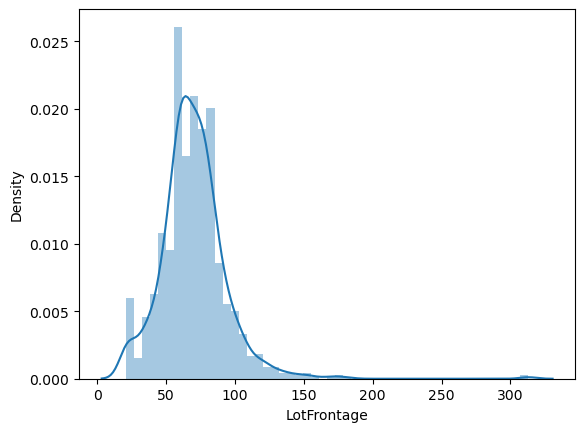

In [16]:
sns.distplot(houseprice['LotFrontage'])

In [17]:
houseprice['LotFrontage'].fillna(houseprice['LotFrontage'].median(), inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2874079563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['LotFrontage'].fillna(houseprice['LotFrontage'].median(), inplace =True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\145270244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['MasVnrArea'])


<Axes: xlabel='MasVnrArea', ylabel='Density'>

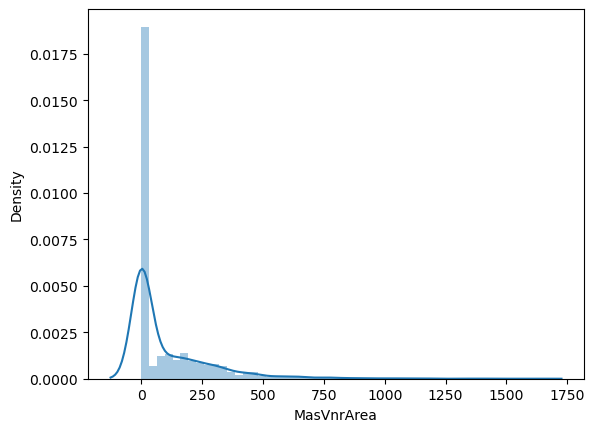

In [18]:
sns.distplot(houseprice['MasVnrArea'])

In [19]:
houseprice['MasVnrArea'].fillna(houseprice['MasVnrArea'].median(), inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\970391663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['MasVnrArea'].fillna(houseprice['MasVnrArea'].median(), inplace =True)


In [20]:
houseprice.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1573915232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\614904328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['BsmtQual'])


<Axes: xlabel='BsmtQual', ylabel='Density'>

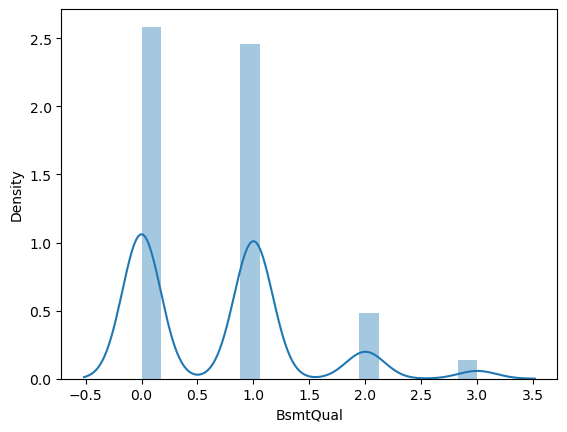

In [21]:
sns.distplot(houseprice['BsmtQual'])

In [22]:
houseprice['BsmtQual'].fillna(houseprice['BsmtQual'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3209192878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['BsmtQual'].fillna(houseprice['BsmtQual'].mode()[0], inplace =True)


In [23]:
houseprice.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1207136855.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2843697141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['BsmtCond'])


<Axes: xlabel='BsmtCond', ylabel='Density'>

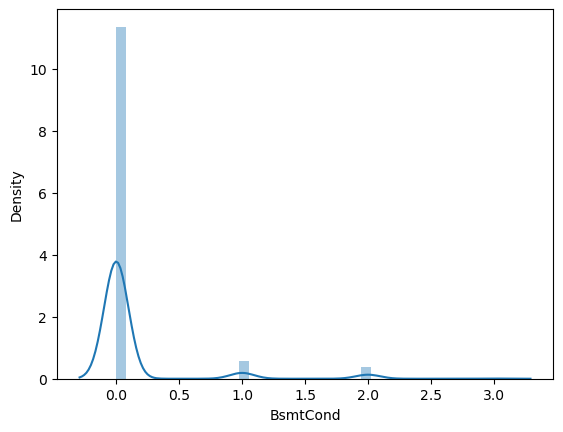

In [24]:
sns.distplot(houseprice['BsmtCond'])

In [25]:
houseprice['BsmtCond'].fillna(houseprice['BsmtCond'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2485892363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['BsmtCond'].fillna(houseprice['BsmtCond'].mode()[0], inplace =True)


In [26]:
houseprice['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [27]:
houseprice.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\35519894.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2802346501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['BsmtExposure'])


<Axes: xlabel='BsmtExposure', ylabel='Density'>

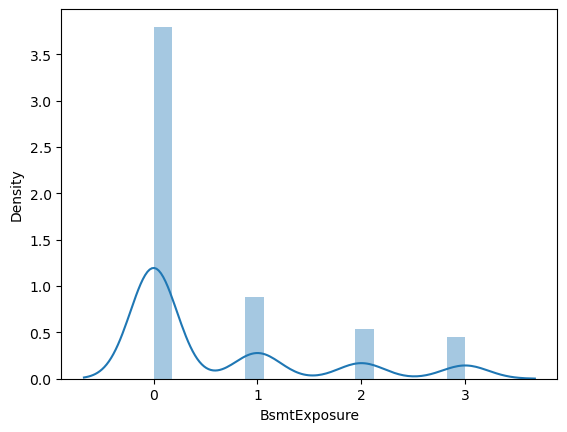

In [28]:
sns.distplot(houseprice['BsmtExposure'])

In [29]:
houseprice['BsmtExposure'].fillna(houseprice['BsmtExposure'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1302298177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['BsmtExposure'].fillna(houseprice['BsmtExposure'].mode()[0], inplace =True)


In [30]:
houseprice['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [31]:
houseprice.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\18651248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\61887462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['BsmtFinType1'])


<Axes: xlabel='BsmtFinType1', ylabel='Density'>

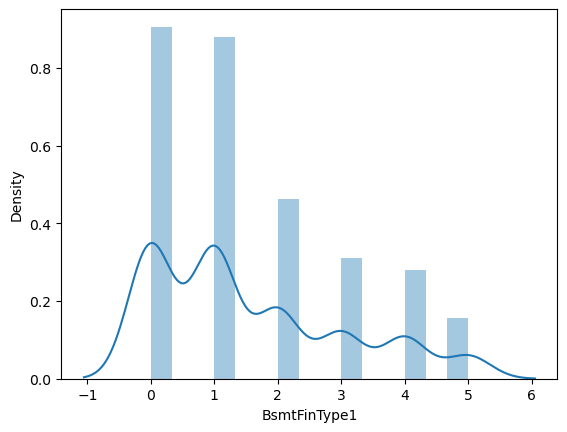

In [32]:
sns.distplot(houseprice['BsmtFinType1'])

In [33]:
houseprice['BsmtFinType1'].fillna(houseprice['BsmtFinType1'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2861521676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['BsmtFinType1'].fillna(houseprice['BsmtFinType1'].mode()[0], inplace =True)


In [34]:
houseprice['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [35]:
houseprice.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1863330818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1457890764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['BsmtFinType2'])


<Axes: xlabel='BsmtFinType2', ylabel='Density'>

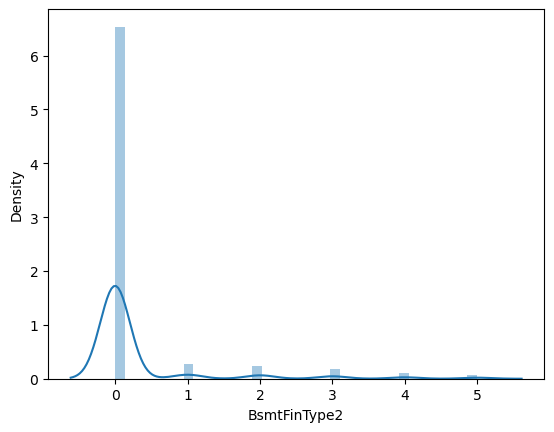

In [36]:
sns.distplot(houseprice['BsmtFinType2'])

In [37]:
houseprice['BsmtFinType2'].fillna(houseprice['BsmtFinType2'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3209928228.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['BsmtFinType2'].fillna(houseprice['BsmtFinType2'].mode()[0], inplace =True)


In [38]:
houseprice['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [39]:
houseprice.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\696705036.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1642107620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['Electrical'])


<Axes: xlabel='Electrical', ylabel='Density'>

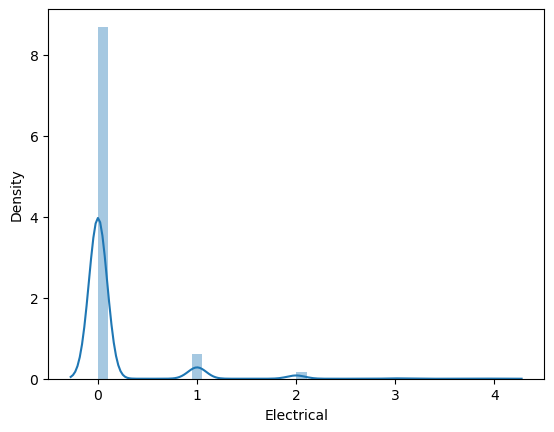

In [40]:
sns.distplot(houseprice['Electrical'])

In [41]:
houseprice['Electrical'].fillna(houseprice['Electrical'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\34575539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['Electrical'].fillna(houseprice['Electrical'].mode()[0], inplace =True)


In [42]:
houseprice['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [43]:
houseprice.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\559076256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\170563528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['GarageType'])


<Axes: xlabel='GarageType', ylabel='Density'>

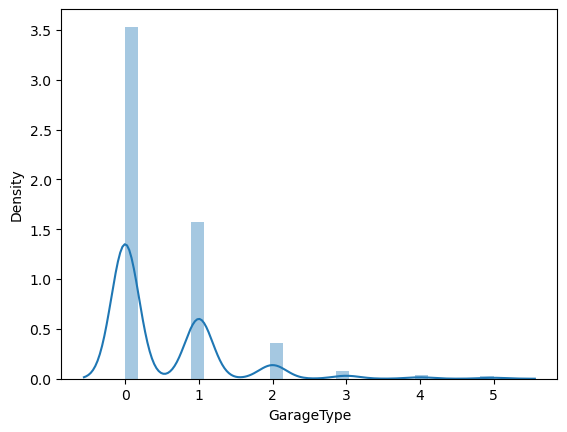

In [44]:
sns.distplot(houseprice['GarageType'])

In [45]:
houseprice['GarageType'].fillna(houseprice['GarageType'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1804766973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['GarageType'].fillna(houseprice['GarageType'].mode()[0], inplace =True)


In [46]:
houseprice['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\244274249.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['GarageYrBlt'])


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

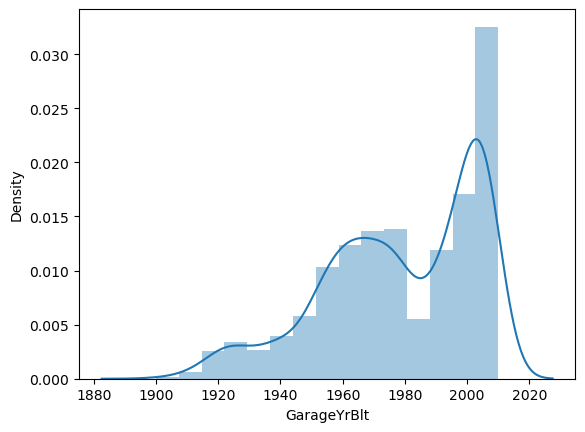

In [47]:
sns.distplot(houseprice['GarageYrBlt'])

In [48]:
houseprice['GarageYrBlt'].fillna(houseprice['GarageYrBlt'].median(), inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3500062789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['GarageYrBlt'].fillna(houseprice['GarageYrBlt'].median(), inplace =True)


In [49]:
houseprice['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [50]:
houseprice.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\861944336.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2407254169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['GarageFinish'])


<Axes: xlabel='GarageFinish', ylabel='Density'>

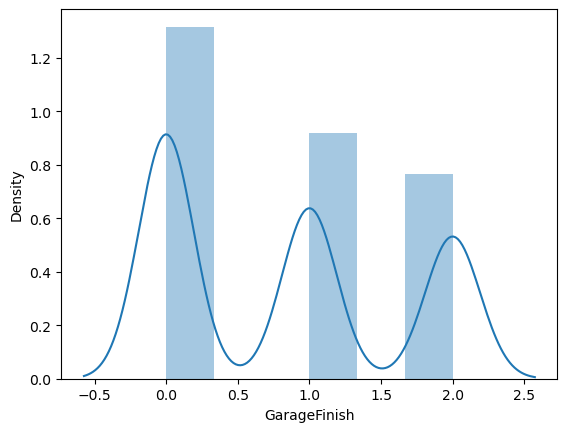

In [51]:
sns.distplot(houseprice['GarageFinish'])

In [52]:
houseprice['GarageFinish'].fillna(houseprice['GarageFinish'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1720044888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['GarageFinish'].fillna(houseprice['GarageFinish'].mode()[0], inplace =True)


In [53]:
houseprice['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [54]:
houseprice.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2905842188.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1213444912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['GarageQual'])


<Axes: xlabel='GarageQual', ylabel='Density'>

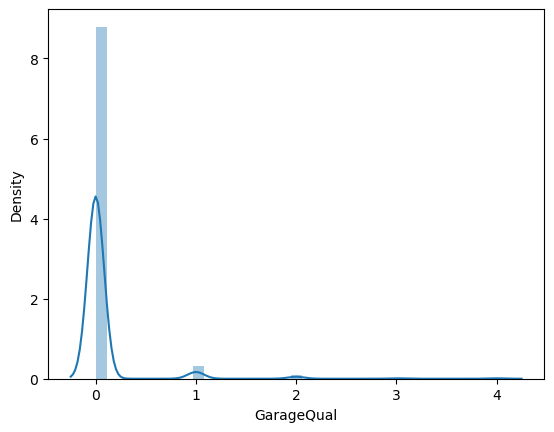

In [55]:
sns.distplot(houseprice['GarageQual'])

In [56]:
houseprice['GarageQual'].fillna(houseprice['GarageQual'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1445544610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['GarageQual'].fillna(houseprice['GarageQual'].mode()[0], inplace =True)


In [57]:
houseprice['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [58]:
houseprice.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\636337693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace = True)


C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\301034834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprice['GarageCond'])


<Axes: xlabel='GarageCond', ylabel='Density'>

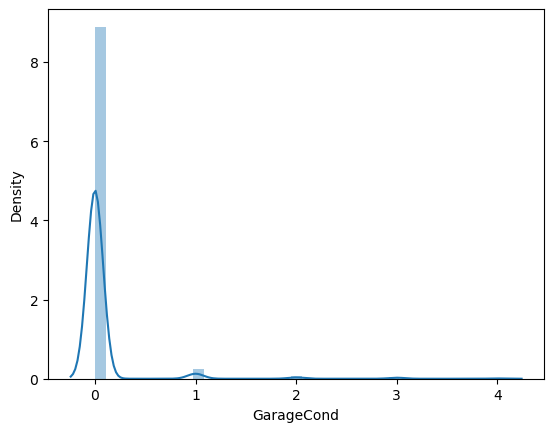

In [59]:
sns.distplot(houseprice['GarageCond'])

In [60]:
houseprice['GarageCond'].fillna(houseprice['GarageCond'].mode()[0], inplace =True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2071129208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houseprice['GarageCond'].fillna(houseprice['GarageCond'].mode()[0], inplace =True)


In [61]:
null_values = houseprice.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [62]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [63]:
houseprice['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [64]:
houseprice.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\632286736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace = True)


In [65]:
houseprice['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [66]:
houseprice.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1347268727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace = True)


In [67]:
houseprice['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [68]:
houseprice.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2993872853.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace = True)


In [69]:
houseprice['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [70]:
houseprice.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3756408262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace = True)


In [71]:
houseprice['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [72]:
houseprice.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2042911207.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace = True)


In [73]:
houseprice['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [74]:
houseprice.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\920007641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace = True)


In [75]:
houseprice['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [76]:
houseprice.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, 'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, 'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace = True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\20935743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, 'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, 'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace = True)


In [77]:
houseprice['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [78]:
houseprice.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1411224549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)


In [79]:
houseprice['Condition1'].value_counts()

Condition1
0    1260
1      81
2      48
3      26
4      19
5      11
6       8
7       5
8       2
Name: count, dtype: int64

In [80]:
houseprice['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [81]:
houseprice.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRAn':7, 'RRAe':8}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\11475120.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRAn':7, 'RRAe':8}}, inplace=True)


In [82]:
houseprice['Condition2'].value_counts()

Condition2
0    1445
1       6
2       2
3       2
4       2
6       1
7       1
8       1
Name: count, dtype: int64

In [83]:
houseprice['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [84]:
houseprice.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1949070254.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)


In [85]:
houseprice['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [86]:
houseprice.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3991970743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)


In [87]:
houseprice['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [88]:
houseprice.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2470748593.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)


In [89]:
houseprice['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [90]:
houseprice.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1844353397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)


In [91]:
houseprice['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [92]:
houseprice.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3153845488.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)


In [93]:
houseprice['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [94]:
houseprice.replace({'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14, 'CBlock':15}}, inplace=True)

In [95]:
houseprice['Exterior2nd'].value_counts()

Exterior2nd
0          504
1          214
2          207
3          197
4          142
CmentBd     60
6           38
7           26
8           25
9           20
10          10
11           7
12           5
13           3
14           1
15           1
Name: count, dtype: int64

In [96]:
houseprice.replace({'Exterior2nd':{'CmentBd':5}},inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1636018192.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Exterior2nd':{'CmentBd':5}},inplace=True)


In [97]:
houseprice['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [98]:
houseprice.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}},inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1801074817.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}},inplace=True)


In [99]:
houseprice['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [100]:
houseprice.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}},inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1182028846.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}},inplace=True)


In [101]:
houseprice['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [102]:
houseprice.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}},inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\2378548934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}},inplace=True)


In [103]:
houseprice['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [104]:
houseprice.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\3849673241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)


In [105]:
houseprice['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [106]:
houseprice.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\797551649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)


In [107]:
houseprice['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [108]:
houseprice.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1248770106.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)


In [109]:
houseprice['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [110]:
houseprice.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\1201338753.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [111]:
houseprice['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [112]:
houseprice.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\711094800.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)


In [113]:
houseprice['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [114]:
houseprice.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\413424927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)


In [115]:
houseprice['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [116]:
houseprice.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\470985095.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)


In [117]:
houseprice['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [118]:
houseprice.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)

C:\Users\Nandana\AppData\Local\Temp\ipykernel_12516\95542561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houseprice.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)


In [119]:
null_values = houseprice.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [120]:
fig, ax = plt.subplots(figsize=(100,100))
sns.boxplot(data=houseprice, ax=ax)

<Axes: >

In [121]:
Q1 = houseprice.quantile(0.25)
Q3 = houseprice.quantile(0.75)

#Calculate IQR - Inter Quartile Range 
IQR = Q3 - Q1

#Determine the outlier boundaries 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

#Create a mask for data within the IQR boundaries 
mask = ~((houseprice < lower_bound) | (houseprice > upper_bound)).any(axis=1)

#Remove outliers 
cleaned_data = houseprice[mask]

In [122]:
fig, ax = plt.subplots(figsize=(100,100))
sns.boxplot(cleaned_data, ax=ax)

<Axes: >

In [123]:
cleaned_data.shape

(151, 75)

In [124]:
correlation = cleaned_data.corr()
correlation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.053677,NaN,-0.123104,-0.095928,NaN,-0.093106,NaN,NaN,-0.079100,...,NaN,NaN,NaN,NaN,NaN,-0.013853,0.035231,NaN,NaN,-0.048364
MSSubClass,0.053677,1.000000,NaN,0.100310,0.194496,NaN,0.183088,NaN,NaN,0.107083,...,NaN,NaN,NaN,NaN,NaN,0.045119,0.075715,NaN,NaN,0.380646
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.123104,0.100310,NaN,1.000000,0.274777,NaN,0.029574,NaN,NaN,0.044044,...,NaN,NaN,NaN,NaN,NaN,-0.021491,-0.010703,NaN,NaN,0.364476
LotArea,-0.095928,0.194496,NaN,0.274777,1.000000,NaN,0.338894,NaN,NaN,0.304581,...,NaN,NaN,NaN,NaN,NaN,0.025197,-0.008553,NaN,NaN,0.276068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013853,0.045119,NaN,-0.021491,0.025197,NaN,-0.055208,NaN,NaN,0.006046,...,NaN,NaN,NaN,NaN,NaN,1.000000,-0.174590,NaN,NaN,-0.027380
YrSold,0.035231,0.075715,NaN,-0.010703,-0.008553,NaN,0.024427,NaN,NaN,0.057572,...,NaN,NaN,NaN,NaN,NaN,-0.174590,1.000000,NaN,NaN,0.043483
SaleType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

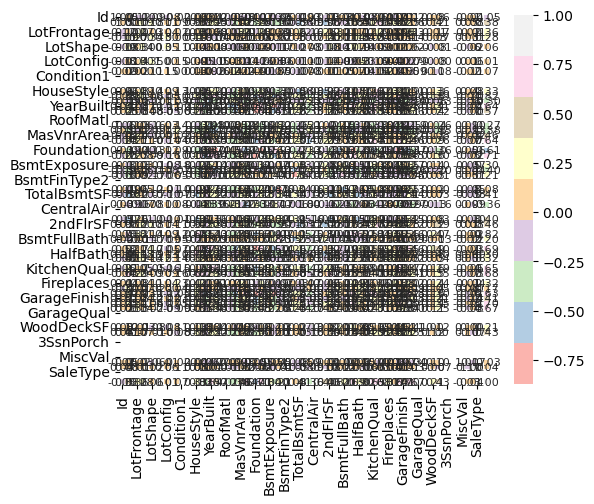

In [125]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='Pastel1')

In [126]:
x = houseprice.drop('SalePrice', axis=1)
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,0,3,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,68.0,11250,0,1,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,60.0,9550,0,1,0,0,1,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,84.0,14260,0,1,0,0,3,...,84,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,40,0,0,0,0,0,8,2007,0,0
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,0,2,2010,0,0
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,60,0,0,0,0,2500,5,2010,0,0
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,112,0,0,0,0,4,2010,0,0


In [127]:
y = houseprice['SalePrice']
y 

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [129]:
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape, y.shape

((1460, 74), (1168, 74), (292, 74), (1168,), (292,), (1460,))

In [130]:
model = RandomForestRegressor()

In [131]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [132]:
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict, y_train)
print('Accuracy of training data:', training_data_accuracy)

Accuracy of training data: 0.975462017441627


In [133]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict, y_test)
print('Accuracy of testing data:', testing_data_accuracy)

Accuracy of testing data: 0.8445085829105752


In [134]:
row_index = 0  # Change this to whichever row you want
row_values = x.iloc[row_index].values  # Returns as NumPy array

# Optional: Convert to list
row_values_list = row_values.tolist()

# Step 3: Print the row values
print(row_values_list)

[1.0, 60.0, 0.0, 65.0, 8450.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 7.0, 5.0, 2003.0, 2003.0, 0.0, 0.0, 0.0, 0.0, 196.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 706.0, 0.0, 0.0, 150.0, 856.0, 0.0, 0.0, 0.0, 0.0, 856.0, 854.0, 0.0, 1710.0, 1.0, 0.0, 2.0, 1.0, 3.0, 1.0, 1.0, 8.0, 0.0, 0.0, 0.0, 2003.0, 1.0, 2.0, 548.0, 0.0, 0.0, 0.0, 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2008.0, 0.0, 0.0]


In [139]:
houseprice.to_csv('cleaned_dataset.csv', index = False)
houseprice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,3,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,1,0,0,1,...,272,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,1,0,0,3,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125


In [143]:
input_data = (3, 60, 0, 68.0, 11250	, 0, 1,	0, 0, 0, 0,	1,	0,	0,	0,	1,	7,	5,	2001,	2002,	0,	0,	0,	0,	162.0,	1,	0,	0,	1.0,	0.0,	3.0	,1.0,	486,	0.0,	0	,434,	920,	0,	0	,0	,0.0	,920	,866,	0	,1786	,1,	0	,2	,1,	3,	1	,1,	6	,0	,1,	0.0	,2001.0	,1.0,	2	,608,	0.0,	0.0,	0	,0	,42	,0	,0	,0	,0,	0	,9	,2008	,0	,0)		
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print('Predicted Sale Price of House:', prediction[0])

Predicted Sale Price of House: 220730.75


C:\Users\Nandana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
